In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

In [2]:

df = pd.read_csv('titanic.csv')  

df = df.drop(['Cabin', 'Name', 'Ticket'], axis=1)

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [3]:
label_encoders = {}
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest Accuracy:  0.810056


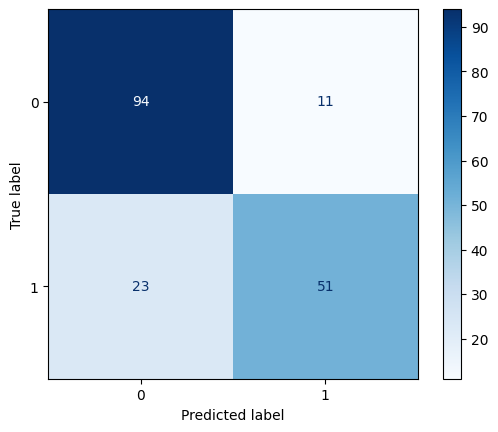

In [4]:
rf_clf = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy : 2f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
disp.plot(cmap="Blues")

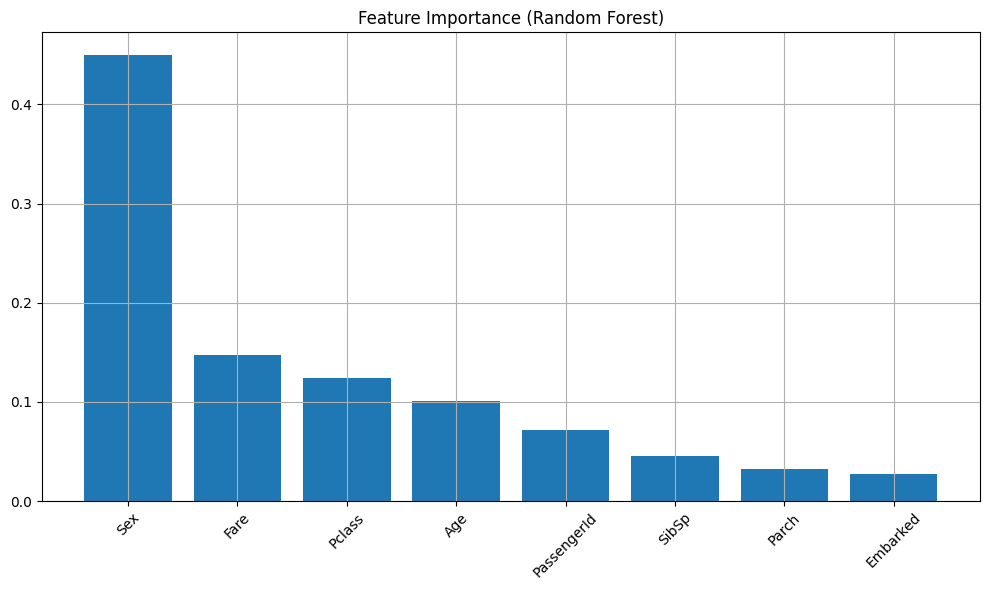

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = rf_clf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


In [6]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200, 500],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Grid search
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit
grid_search.fit(X_train, y_train)

# Best results
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


Best parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 150}
Best cross-validation accuracy: 0.8271840835221116


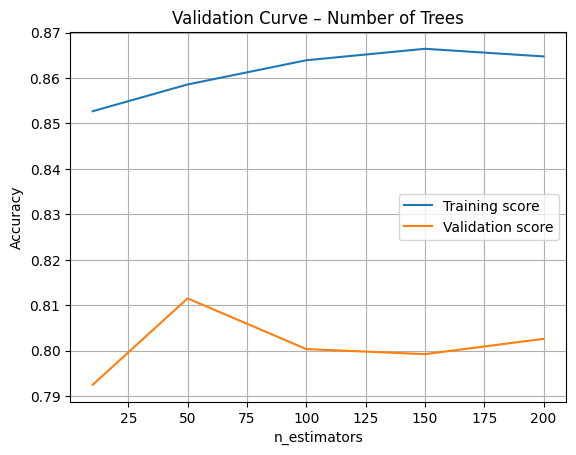

In [7]:
from sklearn.model_selection import validation_curve
import numpy as np

param_range = [10, 50, 100, 150, 200]

train_scores, valid_scores = validation_curve(
    RandomForestClassifier(max_depth=5, random_state=42),
    X, y,
    param_name="n_estimators",
    param_range=param_range,
    cv=5,
    scoring="accuracy"
)

# Mean scores
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

# Plot
plt.plot(param_range, train_scores_mean, label="Training score")
plt.plot(param_range, valid_scores_mean, label="Validation score")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Validation Curve – Number of Trees")
plt.legend()
plt.grid(True)
plt.show()
